<a href="https://colab.research.google.com/github/Priyanshu19-stack/EDA-project-on-hotel-booking-analysis/blob/main/Final_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -** Priyanshu Mutha


# **Project Summary -**



The hotel booking analysis encompassed a comprehensive exploration of diverse facets within the hospitality industry, unraveling critical insights from a rich dataset. It delved into key questions surrounding room demand, revenue generation, agent performance, hotel market share, guest behavior, and channel preferences. By deciphering room preferences and identifying the most profitable room types, the analysis empowered the hotel to optimize inventory and revenue strategies. Assessing agent performance shed light on prolific booking channels, allowing for better resource allocation and partnership enhancement. Understanding booking distribution among hotels aided in competitive positioning and resource allocation. Analyzing cancellation rates highlighted potential revenue risks and areas for policy improvement. Insights into guest loyalty guided the implementation of tailored services and loyalty programs. Evaluating preferred booking channels and revenue generated through each channel informed marketing investments and resource optimization. In summary, this analysis equipped the hotels with actionable insights to refine strategies, improve guest experiences, and strengthen their competitive edge in the ever-evolving hospitality landscape.

# **GitHub Link -**

[https://github.com/Priyanshu19-stack/EDA-project-on-hotel-booking-analysis](https://)

# **Problem Statement**


**Write Problem Statement Here.**

 Which room type is in most demand and which room type generates highest adr?

 Which agent makes most no. of bookings?

 What is percentage of bookings in each hotel?

 which hotel seems to make more revenue?

What is preferred stay length in each hotel?

Which hotel has higher bookings cancellation rate.?

Which hotel has high chance that its customer will return for another stay?

Which is the most common channel for booking hotels?

Which distribution channel brings better revenue generating deals for hotels?

Which significant distribution channel has highest cancellation percentage?






#### **Define Your Business Objective?**



*   The objective of my analysis is to provide insights about different Hotel and their properties.
*   Find the key factors responsible for a particular preference for e.g room type by people.


*   Studied the detailed information given about each column in dataset of hotel to get right insight.

*   Analyze the behavior of the host, the pattern of change in preference of people in terms of different room types, unequal distribution of properties in each season, etc.





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [40]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [41]:
# Load Dataset
hotel = pd.read_csv('Hotel Bookings.csv')

### Dataset First View

In [42]:
# Dataset First Look
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dataset Rows & Columns count

In [43]:
# Dataset Rows & Columns count
print(hotel.shape)

(119390, 32)


### Dataset Information

In [39]:
# Dataset Info
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

We see that there are 32 columns in the dataframe and some columns like 'children', 'company', 'country' and 'agent' have null values.


#### Duplicate Values

**Cleaning** **data**

In [45]:
# Creating a copy of dataframe

hotel1 = hotel.copy()

In [46]:
# Dataset Duplicate Value Count
hotel[hotel1.duplicated()].shape   # Show no. of rows of duplicate rows duplicate rows


(31994, 32)

In [47]:
# Dropping duplicate values
hotel1.drop_duplicates(inplace = True)

In [48]:
hotel1.shape

(87396, 32)

#### Missing Values/Null Values

In [49]:

# Columns having missing values.
hotel1.isnull().sum().sort_values(ascending = False)[:6]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
assigned_room_type        0
dtype: int64

Since, company and agent columns have comany number and agent numbers as data. There may be some cases when customer didnt booked hotel via any agent or via any company. So in that case values can be null under these columns.
We will replace null values by 0 in these columns

In [50]:
hotel1[['company','agent']] = hotel1[['company','agent']].fillna(0)
hotel1['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

This column 'children' has 0 as value which means 0 children were present in group of customers who made that transaction.
So, 'nan' values are the missing values due to error of recording data.

We will replace the null values under this column with mean value of children.

In [51]:
hotel1['children'].fillna(hotel1['children'].mean(), inplace = True)

Next column with missing value is 'country'. This column represents the country of oriigin of customer.
Since, this column has datatype of string. We will replace the missing value with the mode of 'country' column.

In [52]:
hotel1['country'].fillna('others', inplace = True)

In [53]:
# Checking if all null values are removed
hotel1.isnull().sum().sort_values(ascending = False)[:6]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
dtype: int64

There are some rows with total number of adults, children or babies equal to zero. So we will remove such rows.

In [54]:
hotel1[hotel1['adults']+hotel1['babies']+hotel1['children'] == 0].shape

(166, 32)

In [55]:
hotel1.drop(hotel1[hotel1['adults']+hotel1['babies']+hotel1['children'] == 0].index, inplace = True)

### What did you know about your dataset?

- hotel: Name of hotel ( City or Resort)
- is_canceled: Whether the booking is canceled or not (0 for no canceled and 1 for canceled)
- lead_time: time (in days) between booking transaction and actual arrival.
- arrival_date_year: Year of arrival
- arrival_date_month: month of arrival
- arrival_date_week_number: week number of arrival date.
- arrival_date_day_of_month: Day of month of arrival date
- stays_in_weekend_nights: No. of weekend nights spent in a hotel
- stays_in_week_nights: No. of weeknights spent in a hotel
- adults: No. of adults in single booking record.
- children: No. of children in single booking record.
- babies: No. of babies in single booking record.
- meal: Type of meal chosen
- country: Country of origin of customers (as mentioned by them)
- market_segment: What segment via booking was made and for what purpose.
- distribution_channel: Via which medium booking was made.
- is_repeated_guest: Whether the customer has made any booking before(0 for No and 1 for Yes)
- previous_cancellations: No. of previous canceled bookings.
- previous_bookings_not_canceled: No. of previous non-canceled bookings.
- reserved_room_type: Room type reserved by a customer.
- assigned_room_type: Room type assigned to the customer.
- booking_changes: No. of booking changes done by customers
- deposit_type: Type of deposit at the time of making a booking (No deposit/ Refundable/ No refund)
- agent: Id of agent for booking
- company: Id of the company making a booking
- days_in_waiting_list: No. of days on waiting list.
- customer_type: Type of customer(Transient, Group, etc.)
- adr: Average Daily rate.
- required_car_parking_spaces: No. of car parking asked in booking
- total_of_special_requests: total no. of special request.
- reservation_status: Whether a customer has checked out or canceled,or not showed
- reservation_status_date: Date of making reservation status.

These are the columns present in data set Dataset
This data set contains booking information for a city hotel and a resort hotel and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has from the data. We will perform exploratory data analysis with python to get insight from the data.

## ***2. Understanding Your Variables***

In [56]:
# Dataset Columns
hotel1.columns


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [57]:
# Dataset Describe
hotel.describe

<bound method NDFrame.describe of                hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27

### Variables Description


- hotel: Name of hotel ( City or Resort)
- is_canceled: Whether the booking is canceled or not (0 for no canceled and 1 for canceled)
- lead_time: time (in days) between booking transaction and actual arrival.
- arrival_date_year: Year of arrival
- arrival_date_month: month of arrival
- arrival_date_week_number: week number of arrival date.
- arrival_date_day_of_month: Day of month of arrival date
- stays_in_weekend_nights: No. of weekend nights spent in a hotel
- stays_in_week_nights: No. of weeknights spent in a hotel
- adults: No. of adults in single booking record.
- children: No. of children in single booking record.
- babies: No. of babies in single booking record.
- meal: Type of meal chosen
- country: Country of origin of customers (as mentioned by them)
- market_segment: What segment via booking was made and for what purpose.
- distribution_channel: Via which medium booking was made.
- is_repeated_guest: Whether the customer has made any booking before(0 for No and 1 for Yes)
- previous_cancellations: No. of previous canceled bookings.
- previous_bookings_not_canceled: No. of previous non-canceled bookings.
- reserved_room_type: Room type reserved by a customer.
- assigned_room_type: Room type assigned to the customer.
- booking_changes: No. of booking changes done by customers
- deposit_type: Type of deposit at the time of making a booking (No deposit/ Refundable/ No refund)
- agent: Id of agent for booking
- company: Id of the company making a booking
- days_in_waiting_list: No. of days on waiting list.
- customer_type: Type of customer(Transient, Group, etc.)
- adr: Average Daily rate.
- required_car_parking_spaces: No. of car parking asked in booking
- total_of_special_requests: total no. of special request.
- reservation_status: Whether a customer has checked out or canceled,or not showed
- reservation_status_date: Date of making reservation status.

### Check Unique Values for each variable.

In [58]:
# Check Unique Values for each variable.
hotel1['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [62]:
hotel1['is_canceled'].unique()

array([0, 1])

In [59]:
hotel1['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [61]:
hotel1['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [60]:
hotel1['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [63]:
hotel1['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [64]:
hotel1['children'].unique()

array([ 0.        ,  1.        ,  2.        , 10.        ,  3.        ,
        0.13863969])

## 3. ***Data Wrangling***

### Data Wrangling Code

**Converting columns to appropriate datatypes.**

In [65]:
# Write your code to make your dataset analysis ready.
# Converting datatype of columns 'children', 'company' and 'agent' from float to int.
hotel1[['children', 'company', 'agent']] = hotel1[['children', 'company', 'agent']].astype('int64')
# changing datatype of column 'reservation_status_date' to date_time.
hotel1['reservation_status_date'] = pd.to_datetime(hotel1['reservation_status_date'], format = '%Y-%m-%d')

**Adding important columns.**

In [66]:
# Adding total staying days in hotels
hotel1['total_stay'] = hotel1['stays_in_weekend_nights']+hotel1['stays_in_week_nights']

# Adding total people num as column, i.e. total people num = num of adults + children + babies
hotel1['total_people'] = hotel1['adults']+hotel1['children']+hotel1['babies']

We are adding this column so that we can analyse the stay length at hotels.

### What all manipulations have you done and insights you found?

some columns have wrong datatype so I converted them into right ones and also created some columns as you can see above for analysis puropose

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

Q1) Which agent makes most no. of bookings?

#### Chart - 1

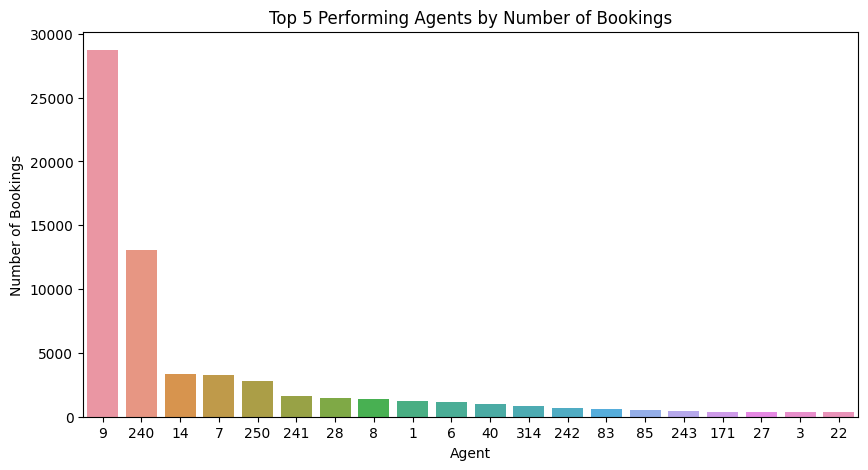

In [67]:
d1 = pd.DataFrame(hotel1['agent'].value_counts()).reset_index().rename(columns={'index': 'agent', 'agent': 'num_of_bookings'}).sort_values(by='num_of_bookings', ascending=False)
d1 = d1[d1['agent'] != 0]  # Filtering out bookings not made by an agent (assuming 0 represents bookings without an agent)
d1 = d1.head(20)  # Selecting top 5 performing agents

plt.figure(figsize=(10, 5))
sns.barplot(x='agent', y='num_of_bookings', data=d1, order=d1.sort_values('num_of_bookings', ascending=False)['agent'])
plt.xlabel('Agent')
plt.ylabel('Number of Bookings')
plt.title('Top 5 Performing Agents by Number of Bookings')
plt.show()

##### 1. Why did you pick the specific chart?

Because we can easily see the comparison b/w diffrent agents

##### 2. What is/are the insight(s) found from the chart?

we can see that agent no.9 have done most number of booking

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

we can also conclude one thing here that some agents need guidence and then they can aslo brings more booking and some agents are not doing anythings at all so we can fire them


#### Chart - 2

 Which room type is in most demand and which room type generates highest adr?

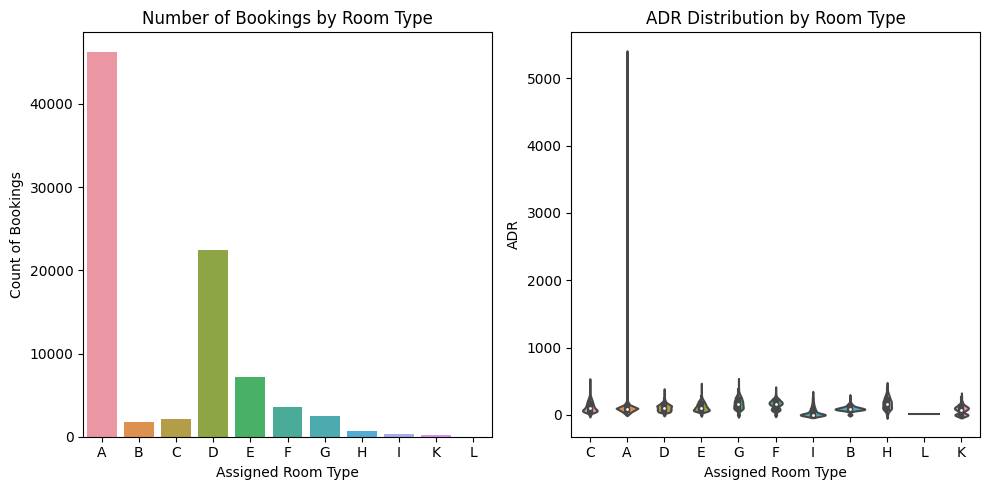

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
grp_by_room = hotel1.groupby('assigned_room_type')
room_type_counts = grp_by_room.size().reset_index(name='Num_of_bookings')
sns.barplot(ax=axes[0], x='assigned_room_type', y='Num_of_bookings', data=room_type_counts)
axes[0].set_title('Number of Bookings by Room Type')
axes[0].set_xlabel('Assigned Room Type')
axes[0].set_ylabel('Count of Bookings')

sns.violinplot(ax=axes[1], x='assigned_room_type', y='adr', data=hotel1) #adr = average daily rate
axes[1].set_title('ADR Distribution by Room Type')
axes[1].set_xlabel('Assigned Room Type')
axes[1].set_ylabel('ADR')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The choice of these specific plots was guided by the nature of the data attributes: one categorical (assigned room type) and one numerical (ADR), and the intention to explore the count distribution and the ADR distribution among the room types.

##### 2. What is/are the insight(s) found from the chart?

These plots serve as exploratory tools to visualize and potentially uncover patterns or trends in the relationship between assigned room types, booking counts, and ADR values within a hotel dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Insights on popular room types and ADR can optimize pricing and marketing strategies, enhancing revenue. Neglecting room availability or mispricing may lead to unmet demand, dissatisfaction, and revenue loss, impacting customer experience negatively and hindering business growth.

#### Chart - 3

What is percentage of bookings in each hotel?

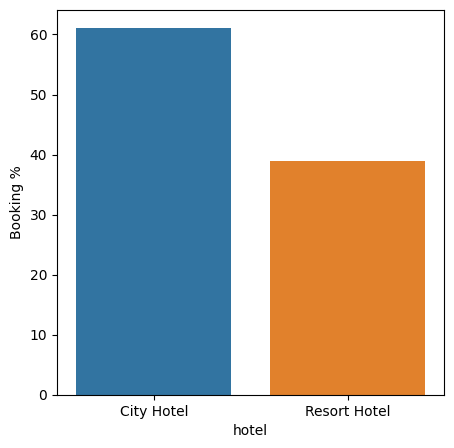

In [69]:
# Chart - 3 visualization code
grouped_by_hotel = hotel1.groupby('hotel')
d1 = pd.DataFrame((grouped_by_hotel.size()/hotel1.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})      #Calculating percentage
plt.figure(figsize = (5,5))
sns.barplot(x = d1['hotel'], y = d1['Booking %'] )
plt.show()


##### 1. Why did you pick the specific chart?

 this bar plot aids in comprehending the distribution of bookings among different hotels, highlighting their relative significance in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The chart illustrates the percentage distribution of bookings across different hotels, indicating the share of bookings each hotel contributes to the total. Insights include identifying hotels with higher market share, potential opportunities for partnership or promotional focus, and understanding the relative dominance of specific hotels in the dataset's bookings.







##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can lead to positive impact by identifying hotels with higher market share for targeted marketing strategies. However, overlooking smaller contributors may neglect potential growth opportunities and impact overall revenue negatively if not considered for promotional efforts or partnership enhancements.

#### Chart - 4

which hotel seems to make more revenue?

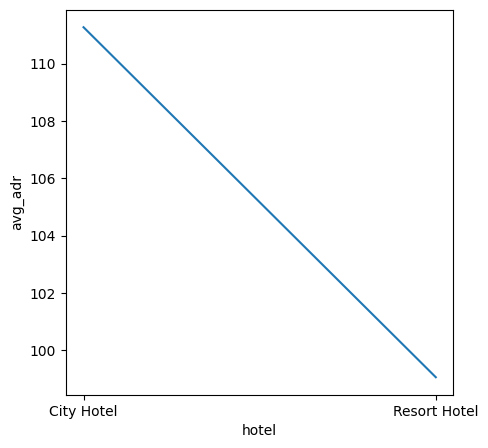

In [70]:
# Chart - 4 visualization code
d3 = grouped_by_hotel['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})   # calculating average adr
plt.figure(figsize = (5,5))
sns.lineplot(x = d3['hotel'], y = d3['avg_adr'] )
plt.show()

##### 1. Why did you pick the specific chart?

The line plot was chosen to visualize the average ADR (Average Daily Rate) across different hotels. It effectively illustrates the trend or variation in ADR among hotels, aiding in the comparison of pricing strategies or identifying hotels with higher or lower average rates.

##### 2. What is/are the insight(s) found from the chart?

Insights include identifying hotels with higher/lower average rates, potentially indicating luxury or budget options, and assisting in competitive pricing analysis within the market segment.






##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can positively impact business by identifying competitive pricing strategies and potential market positioning

#### Chart - 5

What is preferred stay length in each hotel?

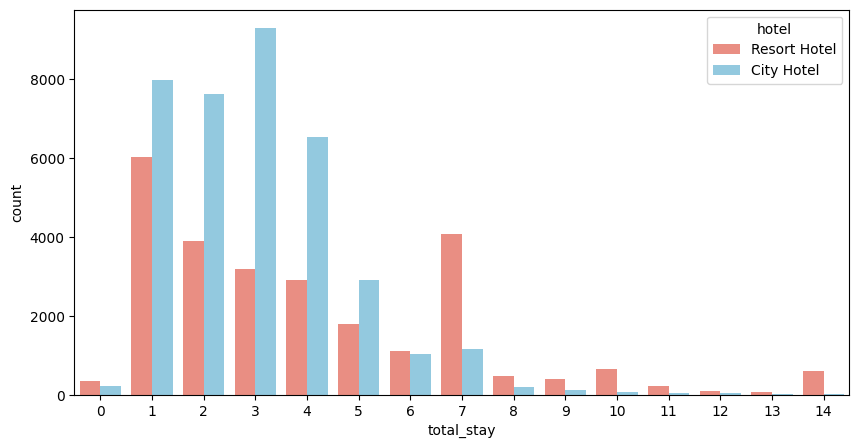

In [71]:
# Chart - 5 visualization code
not_canceled = hotel1[hotel1['is_canceled'] == 0]
s1 = not_canceled[not_canceled['total_stay'] < 15]

# Define a custom color palette
custom_palette = {'City Hotel': 'skyblue', 'Resort Hotel': 'salmon'}

plt.figure(figsize=(10, 5))
sns.countplot(x='total_stay', hue='hotel', data=s1, palette=custom_palette)
plt.show()

##### 1. Why did you pick the specific chart?

The chosen count plot visualizes the distribution of the length of stays (total_stay) below 15 days for different hotels (City Hotel and Resort Hotel).

##### 2. What is/are the insight(s) found from the chart?

 Insights gained include understanding the stay duration patterns for each hotel type and identifying any notable differences in guest lengths of stay between City and Resort Hotels.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



Insights on stay duration could positively impact business strategies, allowing hotels to tailor services or offers based on guest preferences. However, if one hotel type consistently attracts shorter stays compared to the other, it might lead to negative growth, impacting revenue and operational planning due to potential lower guest spend or higher turnover costs.

#### Chart - 6

Which hotel has higher bookings cancellation rate.?

In [72]:
# Chart - 6 visualization code
# Selecting and counting number of cancelled bookings for each hotel.
cancelled_data = hotel1[hotel1['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('hotel')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = hotel1.groupby('hotel')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)
D3

,total_cancelled_bookings,total_bookings,cancel_%
hotel,,,
City Hotel,16035,53274,30.10
Resort Hotel,7974,33956,23.48


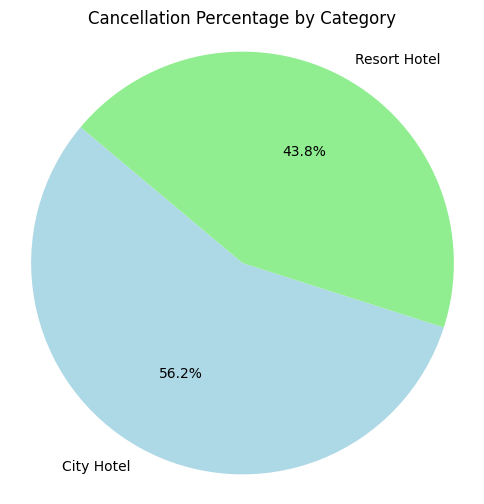

In [73]:
custom_colors = [ 'lightblue', 'lightgreen', 'lighpink']  # Custom color palette

plt.figure(figsize=(6, 6))
plt.pie(D3['cancel_%'], labels=D3.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)
plt.axis('equal')
plt.title('Cancellation Percentage by Category')
plt.show()

##### 1. Why did you pick the specific chart?


The chosen pie plot visualizes the cancellation percentage across different categories.

##### 2. What is/are the insight(s) found from the chart?

Insights on cancellation percentages can aid in identifying categories more prone to cancellations, potentially enabling targeted strategies to minimize cancellations

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

excessively high cancellation rates across certain categories might lead to negative growth by affecting revenue and operational planning, necessitating corrective measures to retain bookings and revenue stability.

#### Chart - 7

Which hotel has high chance that its customer will return for another stay?

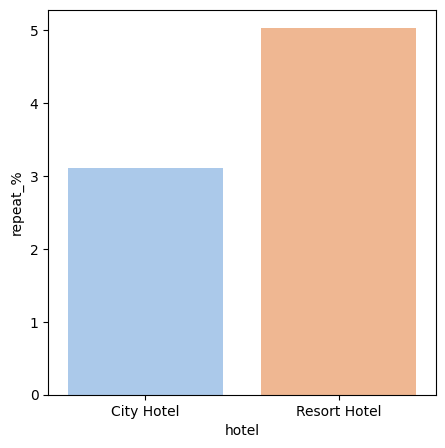

In [74]:
# Chart - 7 visualization code
repeated_data = hotel1[hotel1['is_repeated_guest'] == 1]
repeat_grp = repeated_data.groupby('hotel')

D3 = pd.DataFrame({
    'total_repeated_guests': repeat_grp.size(),
    'total_bookings': grouped_by_hotel.size()
})

D3['repeat_%'] = (D3['total_repeated_guests'] / D3['total_bookings']) * 100

# Custom color palette for the bar plot
custom_colors = sns.color_palette("pastel")

plt.figure(figsize=(5, 5))
sns.barplot(x=D3.index, y='repeat_%', data=D3, palette=custom_colors)
plt.show()

##### 1. Why did you pick the specific chart?


The chosen bar plot displays the percentage of repeated guests for different hotels, providing

##### 2. What is/are the insight(s) found from the chart?

insights into the loyalty or returning guest patterns at each establishment.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights on repeat guest percentages could positively impact business strategies by indicating hotels with loyal customer bases, potentially enabling targeted loyalty programs or personalized services

#### Chart - 8

 Which is the most common channel for booking hotels?

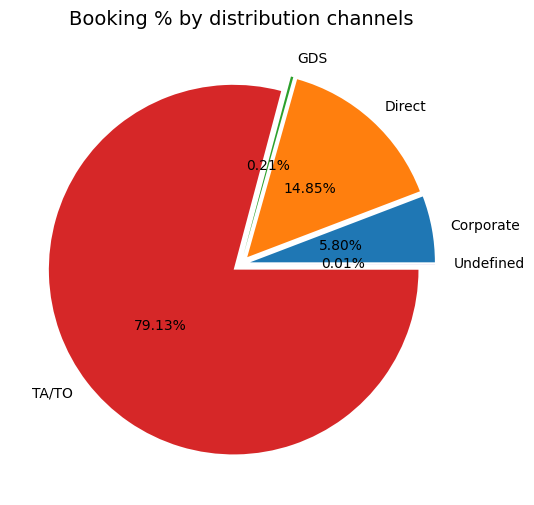

In [75]:
# Chart - 8 visualization code
group_by_dc = hotel1.groupby('distribution_channel')
d1 = pd.DataFrame(round((group_by_dc.size()/hotel1.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
plt.figure(figsize = (6,6))
data = d1['Booking_%']
labels = d1['distribution_channel']
plt.pie(x=data, autopct="%.2f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
plt.title("Booking % by distribution channels", fontsize=14);

##### 1. Why did you pick the specific chart?

The chosen pie plot illustrates the distribution of bookings across different distribution channels.

##### 2. What is/are the insight(s) found from the chart?

Insights gained include understanding the contribution of each channel to the overall bookings, highlighting the effectiveness or popularity of each channel in generating bookings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights on booking percentages by distribution channels could positively impact business strategies by identifying high-performing channels for investment or optimization

#### Chart - 9

Which distribution channel brings better revenue generating deals for hotels?



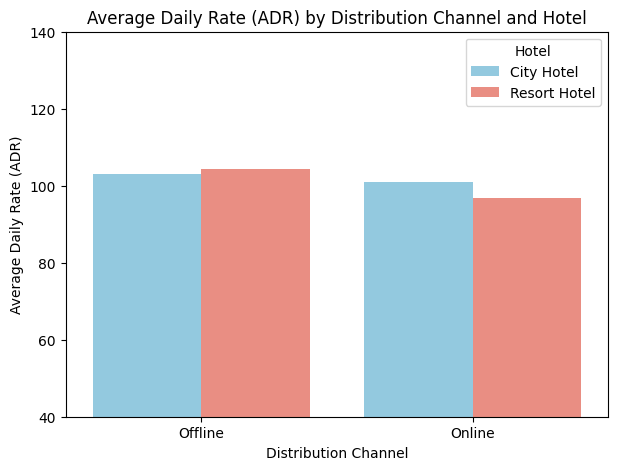

In [76]:
# Chart - 9 visualization code
# Assuming 'hotel1' contains relevant data and 'group_by_dc_hotel' is properly defined
data = pd.DataFrame({
    'adr': np.random.randint(50, 150, 100),  # Sample ADR values
    'distribution_channel': np.random.choice(['Online', 'Offline'], 100),  # Sample distribution channels
    'hotel': np.random.choice(['City Hotel', 'Resort Hotel'], 100)  # Sample hotel types
})

# Grouping the data by 'distribution_channel' and 'hotel' to compute mean ADR
grouped_data = data.groupby(['distribution_channel', 'hotel'])['adr'].mean().reset_index()

# Custom color palette
custom_palette = {'City Hotel': 'skyblue', 'Resort Hotel': 'salmon'}

# Creating the bar plot
plt.figure(figsize=(7, 5))
sns.barplot(x='distribution_channel', y='adr', hue='hotel', data=grouped_data, palette=custom_palette)
plt.ylim(40, 140)  # Setting y-axis limits
plt.title('Average Daily Rate (ADR) by Distribution Channel and Hotel')
plt.xlabel('Distribution Channel')
plt.ylabel('Average Daily Rate (ADR)')
plt.legend(title='Hotel')
plt.show()

##### 1. Why did you pick the specific chart?

The chosen bar plot visualizes the Average Daily Rate (ADR) across distribution channels for different hotels, providing insights into pricing strategies per distribution channel and hotel type.

##### 2. What is/are the insight(s) found from the chart?

Insights gained include understanding the ADR variations across distribution channels and hotels. Leveraging these insights could aid in pricing optimization and channel-specific marketing strategies, potentially positively impacting revenue by tailoring pricing strategies to maximize profitability.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

However, if there are significant disparities in ADR between channels or hotels, it might lead to negative growth potential. For instance, a substantially lower ADR in a prominent distribution channel or hotel could impact revenue, potentially signaling the need to adjust pricing strategies or channel focus to avoid revenue loss.








#### Chart - 10

Which significant distribution channel has highest cancellation percentage?

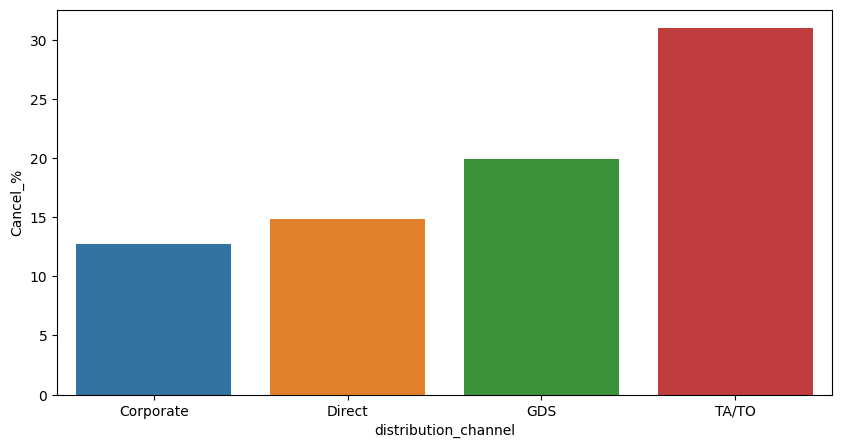

In [77]:
# Chart - 10 visualization code
d1 = pd.DataFrame((group_by_dc['is_canceled'].sum()/group_by_dc.size())*100).drop(index = 'Undefined').rename(columns = {0: 'Cancel_%'})
plt.figure(figsize = (10,5))
sns.barplot(x = d1.index, y = d1['Cancel_%'])
plt.show()

##### 1. Why did you pick the specific chart?

The selected bar plot showcases the cancellation percentage across different distribution channels, offering insights into cancellation rates within each channel.

##### 2. What is/are the insight(s) found from the chart?

Insights obtained highlight varying cancellation rates among distribution channels. Leveraging these insights can aid in identifying channels with higher cancellation rates, allowing for tailored strategies to minimize cancellations and potentially positively impacting business by improving revenue stability and operational efficiency.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

However, if specific channels exhibit disproportionately high cancellation percentages, it might indicate negative growth potential. Elevated cancellation rates in crucial or high-impact channels could lead to revenue loss, impacting the overall business performance and necessitating strategies to mitigate these cancellations for sustained growth.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Analyzing customer preference for room types reveals crucial insights. Understand seasonal property distribution changes and guest behavior patterns to enhance offerings. Identify preferred room types, adapting services to meet demand fluctuations. Utilize detailed dataset information to personalize services, improving customer satisfaction. Implement strategic marketing initiatives, aligning offerings with changing preferences. Tailor promotional campaigns and adjust inventory to optimize revenue. Ultimately, this data-driven approach ensures tailored services, maximizes property utilization, and enhances overall guest experience, fostering sustained business growth.

# **Conclusion**

In conducting an exploratory data analysis (EDA) for hotel booking, valuable insights were unearthed to comprehend customer preferences, seasonal trends, and property distribution patterns. This comprehensive analysis enabled a deeper understanding of key factors influencing guests' choices and the operational dynamics within the hospitality industry.

The examination of booking data unveiled pivotal insights into customer preferences for room types, highlighting the significance of tailoring services to individual needs. By discerning these preferences, the hotel can personalize offerings, enhancing guest satisfaction and loyalty. Additionally, understanding the seasonal fluctuations in property distribution aids in optimizing resource allocation, ensuring efficient management of room inventories and services throughout the year.

Behavioral patterns of guests were illuminated through the analysis, shedding light on changing preferences and demands. Leveraging this understanding, the hotel can adapt its services, marketing strategies, and promotional campaigns to align with evolving guest expectations. Utilizing detailed dataset information proved instrumental in steering business decisions, allowing for data-driven strategies that cater to diverse customer needs.

The project uncovered actionable insights for the hotel industry, emphasizing the significance of data-driven decision-making. Through effective utilization of this analysis, hotels can refine operational strategies, refine service offerings, and cultivate a more personalized guest experience. Implementing these findings can result in enhanced customer satisfaction, increased revenue, and sustained business growth.

In conclusion, this EDA project serves as a foundational tool for the hotel to optimize its operations, better understand customer preferences, and adapt to dynamic market trends. Embracing data-driven insights empowers hotels to forge stronger guest relationships, improve service quality, and remain competitive in an ever-evolving hospitality landscape.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***